## Install needed libraries

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

path = "/content/gdrive/MyDrive/Chuyên đề nghiên cứu 1/vnquant_package"
%cd {path}
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Chuyên đề nghiên cứu 1/vnquant_package


In [ ]:
!git clone https://github.com/phamdinhkhanh/vnquant
%cd vnquant
!python setup.py install

Cloning into 'vnquant'...
remote: Enumerating objects: 341, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 341 (delta 65), reused 89 (delta 53), pack-reused 237
Receiving objects: 100% (341/341), 1.05 MiB | 3.65 MiB/s, done.
Resolving deltas: 100% (164/164), done.
/content/gdrive/MyDrive/Chuyên đề nghiên cứu 1/vnquant_package/vnquant
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initia

In [ ]:
%cd ..
!rm -rf vnquant
!ls

/content/gdrive/MyDrive/Chuyên đề nghiên cứu 1/vnquant_package


In [ ]:
!pip freeze | grep vnquant

vnquant==0.1.1


In [ ]:
import vnquant
vnquant.__version__

'0.1.1'

In [ ]:
pip install plotly

## Import libraries to visualize data

In [ ]:
import vnquant.data as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## We choose 10 codes from biggest companies on stock exchange in Vietnam

In [ ]:
stock_symbols = ['VIC', 'VCB', 'VNM', 'GAS', 'HVN', 'MWG', 'FPT', 'HPG', 'MSN', 'SAB']

## Initialize datasets of companies

In [ ]:
stock_data = {}

for symbol in stock_symbols:
  df = dt.DataLoader(symbols=symbol,
                     start="2019-01-01",
                     end="2024-01-01",
                     minimal=True,
                     data_source="VND")
  stock_data[symbol] = df.download()

In [ ]:
stock_data[stock_symbols[6]].head()

Attributes,high,low,open,close,avg,volume
Symbols,FPT,FPT,FPT,FPT,FPT,FPT
date,,,,,,
2019-01-02,42.15,41.15,41.80,41.2,41.68,459120.0
2019-01-03,41.45,40.70,41.45,40.8,40.94,716600.0
2019-01-04,41.45,40.50,40.60,41.1,40.87,318570.0
2019-01-07,42.10,41.60,41.80,41.8,41.90,408470.0
2019-01-08,42.00,41.70,41.80,42.0,41.85,295660.0


## Explore and visualize the datasets

In [ ]:
stock_data

{'VIC': Attributes    high    low    open   close     avg     volume
 Symbols        VIC    VIC     VIC     VIC     VIC        VIC
 date                                                        
 2019-01-02  101.30  97.50  101.20  100.40  100.09   602450.0
 2019-01-03  100.30  98.20  100.00  100.30   99.10   496950.0
 2019-01-04  100.70  98.00  100.00  100.60   99.62   458000.0
 2019-01-07  103.00  99.90  100.90  101.00  100.87   589150.0
 2019-01-08  102.00  99.70  102.00  101.00  100.38   494300.0
 ...            ...    ...     ...     ...     ...        ...
 2023-12-25   43.55  43.00   43.10   43.40   43.34  3364500.0
 2023-12-26   43.75  43.35   43.40   43.55   43.55  1806700.0
 2023-12-27   43.95  43.60   43.65   43.60   43.76  1920500.0
 2023-12-28   44.60  43.60   43.60   44.45   44.32  4359700.0
 2023-12-29   44.85  44.45   44.65   44.60   44.63  2474300.0
 
 [1250 rows x 6 columns],
 'VCB': Attributes  high   low  open close    avg     volume
 Symbols      VCB   VCB   VCB   VCB 

In [ ]:
stock_data[stock_symbols[7]].index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='date', length=1250, freq=None)

In [ ]:
stock_data[stock_symbols[5]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1250 entries, 2019-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (high, MWG)    1250 non-null   float64
 1   (low, MWG)     1250 non-null   float64
 2   (open, MWG)    1250 non-null   float64
 3   (close, MWG)   1250 non-null   float64
 4   (avg, MWG)     1250 non-null   float64
 5   (volume, MWG)  1250 non-null   float64
dtypes: float64(6)
memory usage: 68.4 KB


In [ ]:
stock_data[stock_symbols[1]].describe()

Attributes,high,low,open,close,avg,volume
Symbols,VCB,VCB,VCB,VCB,VCB,VCB
count,1250.000000,1250.000000,1250.00000,1250.00000,1250.000000,1.250000e+03
mean,86.006800,84.066800,85.02880,85.09936,85.032732,1.143016e+06
std,11.754628,11.499226,11.66976,11.65516,11.622145,6.345047e+05
min,54.100000,52.600000,53.30000,53.60000,53.520000,1.414500e+05
25%,79.325000,77.100000,78.02500,78.20000,78.102500,7.100325e+05
50%,86.000000,84.800000,85.40000,85.30000,85.410000,1.017720e+06
75%,94.575000,92.275000,93.20000,93.50000,93.337500,1.429500e+06
max,117.200000,115.000000,116.70000,116.40000,116.120000,6.274200e+06


In [ ]:
stock_data[stock_symbols[0]]['close'].value_counts()

VIC  
95.0     15
115.0    13
116.0    11
117.0    11
115.9    10
         ..
81.3      1
81.2      1
81.1      1
80.8      1
144.0     1
Length: 564, dtype: int64

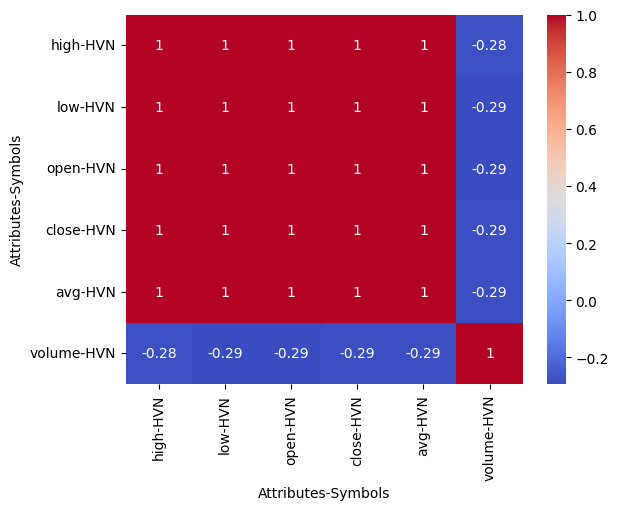

In [ ]:
sns.heatmap(stock_data[stock_symbols[4]].corr(), annot=True, cmap='coolwarm')
plt.show()

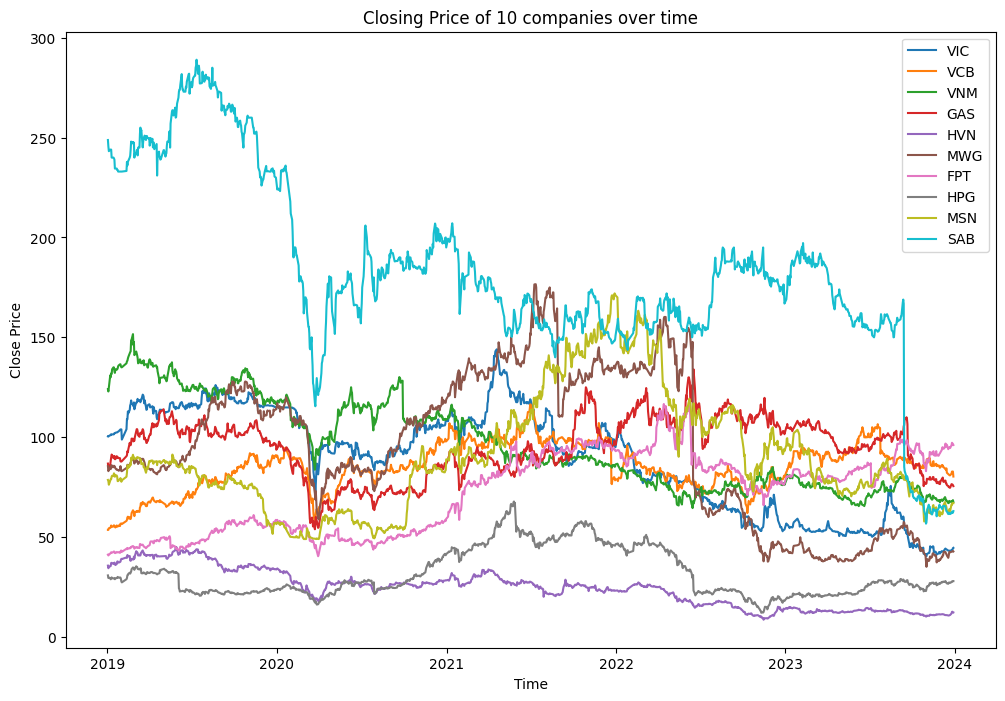

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Closing Price of 10 companies over time")

for symbol in stock_symbols:
  df = dt.DataLoader(symbols=symbol,
                     start="2019-01-01",
                     end="2024-01-01",
                     minimal=True,
                     data_source="VND")
  df = df.download()
  plt.plot(df.index, df['close'], label=symbol)

plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()

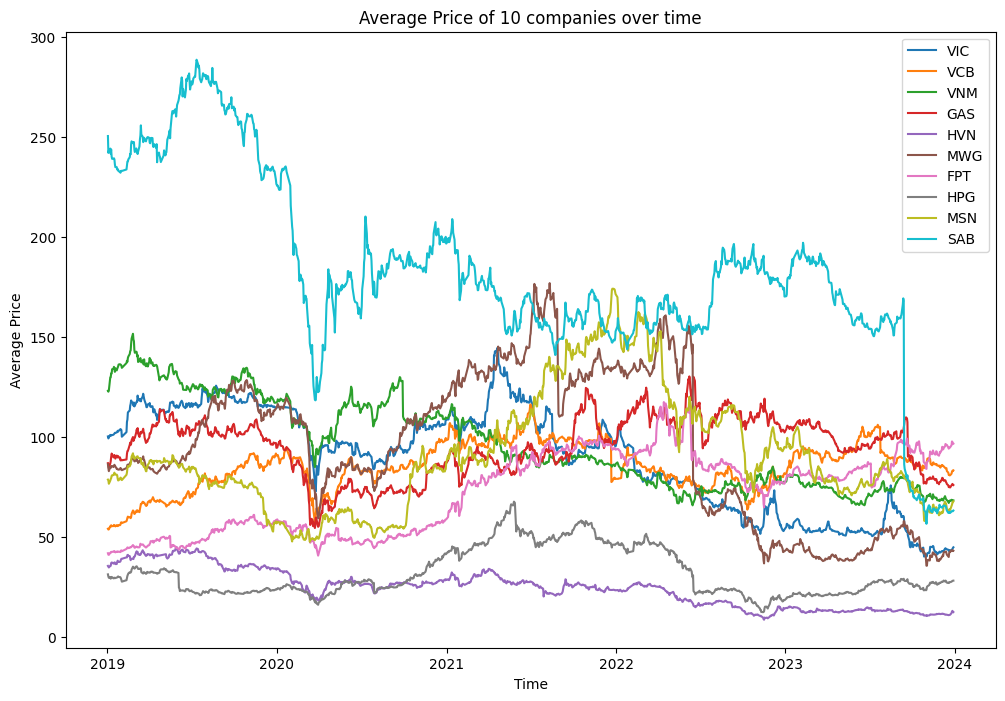

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Average Price of 10 companies over time")

for symbol in stock_symbols:
  df = dt.DataLoader(symbols=symbol,
                     start="2019-01-01",
                     end="2024-01-01",
                     minimal=True,
                     data_source="VND")
  df = df.download()
  plt.plot(df.index, df['avg'], label=symbol)

plt.xlabel("Time")
plt.ylabel("Average Price")
plt.legend()
plt.show()

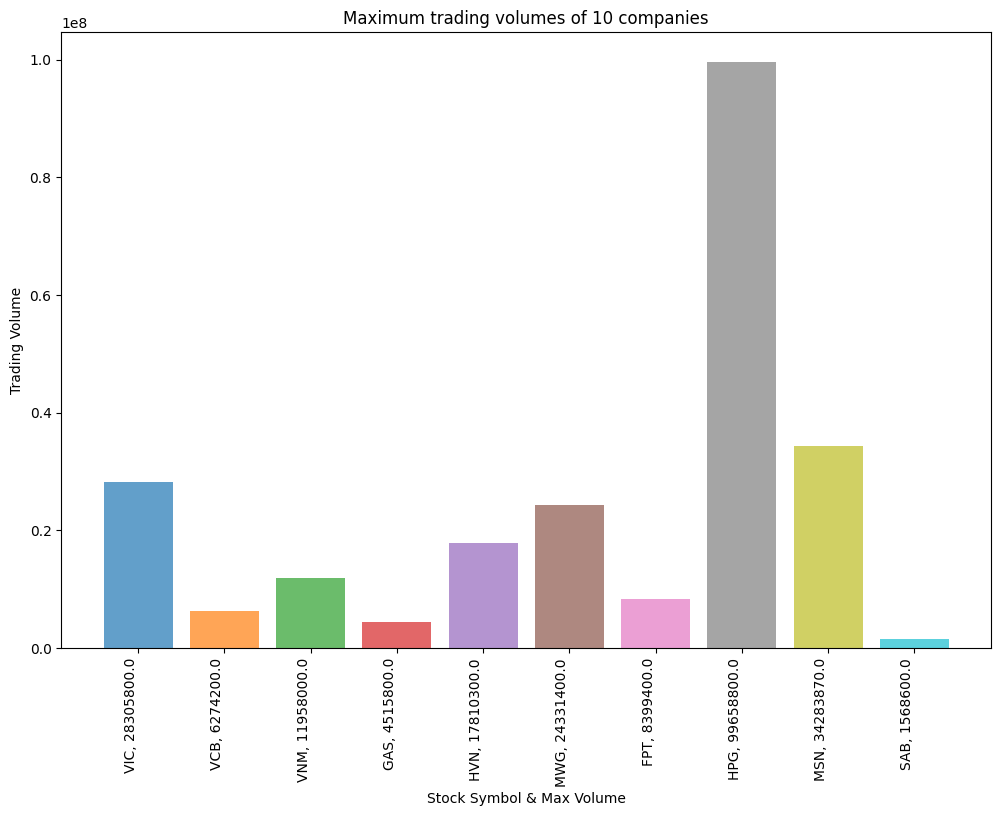

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Maximum trading volumes of 10 companies")

symbols = []
max_volumes = []

for symbol in stock_symbols:
  df = dt.DataLoader(symbols=symbol,
                     start="2019-01-01",
                     end="2024-01-01",
                     minimal=True,
                     data_source="VND")
  df = df.download()
  symbols.append(symbol)
  max_volume = df['volume'].max()
  max_volumes.append(f'{symbol}, {max_volume.item()}')
  plt.bar(symbol, max_volume.item(), alpha=0.7)

plt.xticks(symbols, max_volumes, rotation=90, ha='right')

plt.xlabel('Stock Symbol & Max Volume')
plt.ylabel('Trading Volume')
plt.show()

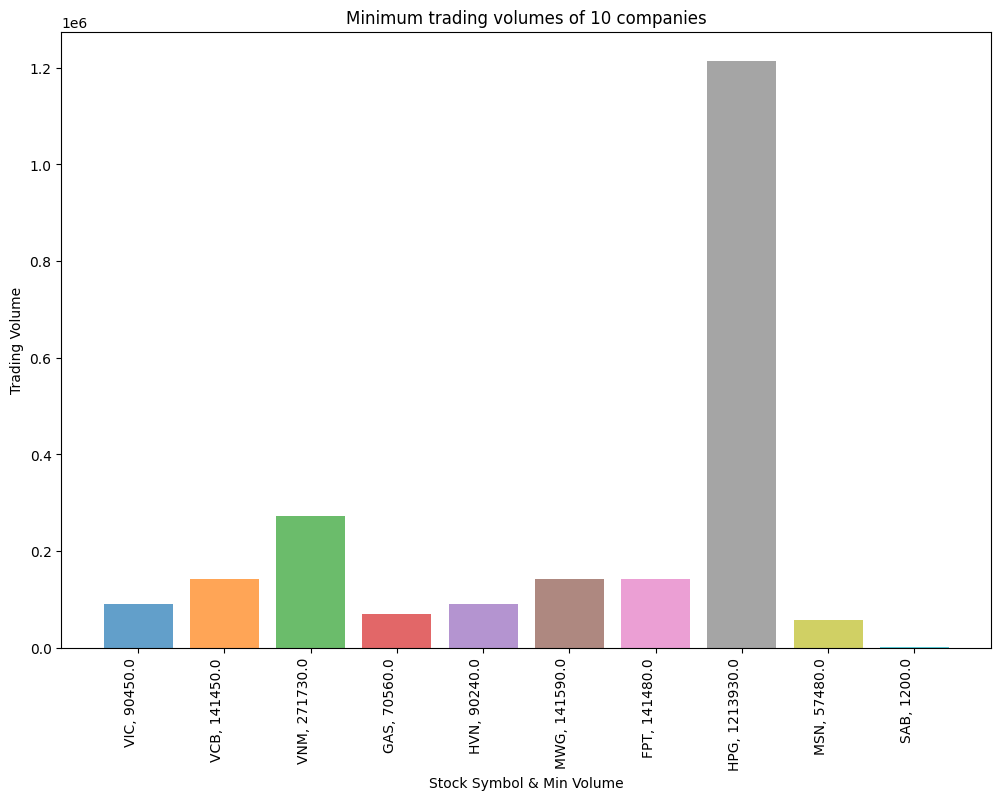

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Minimum trading volumes of 10 companies")

symbols = []
min_volumes = []

for symbol in stock_symbols:
  df = dt.DataLoader(symbols=symbol,
                     start="2019-01-01",
                     end="2024-01-01",
                     minimal=True,
                     data_source="VND")
  df = df.download()
  symbols.append(symbol)
  min_volume = df['volume'].min()
  min_volumes.append(f'{symbol}, {min_volume.item()}')
  plt.bar(symbol, min_volume.item(), alpha=0.7)

plt.xticks(symbols, min_volumes, rotation=90, ha='right')

plt.xlabel('Stock Symbol & Min Volume')
plt.ylabel('Trading Volume')
plt.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
for symbol in stock_symbols:
  df = dt.DataLoader(symbols=symbol,
                     start="2019-01-01",
                     end="2024-01-01",
                     minimal=True,
                     data_source="VND")
  df = df.download()

  fig.add_trace(go.Candlestick(x=df.index,
                               open=df['open'],
                               high=df['high'],
                               low=df['low'],
                               close=df['close'],
                               name=symbol))

fig.update_layout(title="Candlestick Chart for 10 companies",
                  xaxis_title="Time",
                  yaxis_title="Stock Price",
                  xaxis_rangeslider_visible=False)

fig.show()